No handles with labels found to put in legend.


  Number of iteration Activation nLayer nHiddenNeuron      Loss  RSquare  \
0                   1   identity      1             1  0.666290     -1.0   
0                  40       tanh      4            10  0.000112      1.0   
0                  38       relu      4             8  0.000071      1.0   
0                  26   logistic      3             6  0.000606      1.0   

   Misclassification  
0                0.5  
0                0.0  
0                0.0  
0                0.0  


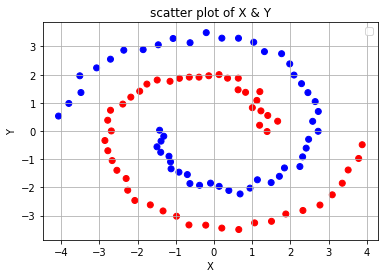

Mean: 0.9999960564
Standard Deviaiton: 0.0000133533


In [21]:


def Build_NN_relu_result(nLayer, nHiddenNeuron):
    # Build Neural Network
    nnObj = nn.MLPClassifier(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
                            activation = 'relu', verbose = False,
                            solver = 'lbfgs', learning_rate_init = 0.1,
                            max_iter = 5000, random_state = 20191108)
    thisFit = nnObj.fit(X, y) 
    y_pred = nnObj.predict(X)
    Loss = nnObj.loss_
    yproba = nnObj.predict_proba(X)
    RSquare = metrics.r2_score(y, y_pred)
    Missclassification = 1 - metrics.accuracy_score(y, y_pred)    
    return (Loss, RSquare, Missclassification, y_pred, yproba)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.neural_network as nn
import sklearn.metrics as metrics
import statistics as st
# import csv

dataset = pd.read_csv("SpiralWithCluster.csv") 
spiral=dataset['SpectralCluster']
dataset.head()

spiral.value_counts()

X = dataset[['x','y']]
y = dataset['SpectralCluster']


def Build_NN(nLayer, nHiddenNeuron,act_fn):
    # Build Neural Network
    nnObj = nn.MLPClassifier(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
                            activation = act_fn, verbose = False,
                            solver = 'lbfgs', learning_rate_init = 0.1,
                            max_iter = 5000, random_state = 20191108)
    # nnObj.out_activation_ = 'identity'
    thisFit = nnObj.fit(X, y) 
    y_pred = nnObj.predict(X)
    Loss = nnObj.loss_
    RSquare = metrics.r2_score(y, y_pred)
    Missclassification = 1 - metrics.accuracy_score(y, y_pred)    
    return (Loss, RSquare, Missclassification)

result = pd.DataFrame(columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification'])
# activiation_functions: identity, logistic, tanh, relu

for i in np.arange(1,6):
    for j in np.arange(1,11):
        Loss, RSquare, Accuracy = Build_NN(nLayer = i, nHiddenNeuron = j,act_fn='relu')
        result = result.append(pd.DataFrame([['relu',i, j, Loss, RSquare,Accuracy]], 
                               columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification']))
result.to_csv('relu.csv',index=False)


result = pd.DataFrame(columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification'])
for i in np.arange(1,6):
    for j in np.arange(1,11):
        Loss, RSquare, Accuracy = Build_NN(nLayer = i, nHiddenNeuron = j,act_fn='identity')
        result = result.append(pd.DataFrame([['identity',i, j, Loss, RSquare,Accuracy]], 
                               columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification']))
result.to_csv('identity.csv',index=False)

result = pd.DataFrame(columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification'])
for i in np.arange(1,6):
    for j in np.arange(1,11):
        Loss, RSquare, Accuracy = Build_NN(nLayer = i, nHiddenNeuron = j,act_fn='logistic')
        result = result.append(pd.DataFrame([['logistic',i, j, Loss, RSquare,Accuracy]], 
                               columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification']))
result.to_csv('logistic.csv',index=False)

result = pd.DataFrame(columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification'])
for i in np.arange(1,6):
    for j in np.arange(1,11):
        Loss, RSquare, Accuracy = Build_NN(nLayer = i, nHiddenNeuron = j,act_fn='tanh')
        result = result.append(pd.DataFrame([['tanh',i, j, Loss, RSquare,Accuracy]], 
                               columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification']))
result.to_csv('tanh.csv',index=False)
identity_csv = pd.read_csv('identity.csv')
logistic_csv = pd.read_csv('logistic.csv')
relu_csv = pd.read_csv('relu.csv')
tanh_csv = pd.read_csv('tanh.csv')


identity_mcr = identity_csv[identity_csv.Misclassification<=0.5]
relu_mcr = relu_csv[relu_csv.Misclassification<=0.5]
tanh_mcr = tanh_csv[tanh_csv.Misclassification<=0.5]
logistic_mcr = logistic_csv[identity_csv.Misclassification<=0.5]


nX = [identity_mcr,tanh_mcr,relu_mcr,logistic_mcr]
result = pd.DataFrame(columns = ['Number of iteration','Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification'])
for i in nX:
    x1=(i.loc[i['Loss'].idxmin()]).name
    x2=(i.loc[i['Loss'].idxmin()]).values.tolist()
    result = result.append(pd.DataFrame([[x1+1,x2[0],x2[1],x2[2],x2[3],x2[4],x2[5]]], 
                               columns = ['Number of iteration','Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification']))

result=result[['Number of iteration','Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification']]
print(result)

result = pd.DataFrame(columns = ['Activation','nLayer', 'nHiddenNeuron', 'Loss', 'RSquare','Misclassification'])
act=["identity", "logistic", "tanh", "relu"]
Loss, RSquare, Accuracy,column,pred_prob = Build_NN_relu_result(nLayer = 4, nHiddenNeuron = 8)
color=[]
spectral_cluster_1=[]
spectral_cluster_0=[]
pred_prob=list(pred_prob)
for i in range(len(column)):
    if(column[i]==0):
        color.append('Red')
        spectral_cluster_0.append(pred_prob[i])
    else:
        color.append('Blue')
        spectral_cluster_1.append(pred_prob[i])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("scatter plot of X & Y")
plt.scatter(dataset['x'],dataset['y'], c=color)
plt.grid()
plt.show()

x_spectral_cluster=[]
y_spectral_cluster=[]
for i in spectral_cluster_1:
    x_spectral_cluster.append(i[0])
    y_spectral_cluster.append(i[1])
mean=st.mean(y_spectral_cluster)
print('Mean:',format(mean, '.10f'))
print('Standard Deviaiton:',format(st.stdev(y_spectral_cluster), '.10f'))

Accuracy =  0.5
Misclassficiation rate 0.5
Coefficients  [0.05333512 0.32868383]
Equation: 0.05333511993002649x + 0.32868383163967874y + 0.0033449990212439536 = 0
Intercept =  [0.003345]
Coefficients =  [[0.05333512 0.32868383]]


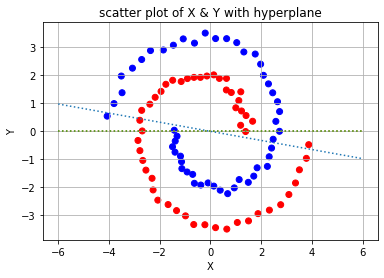

Mean Accuracy =  0.55
Intercept =  [1.7610532]
Coefficients =  [[-0.57239859 -0.05567796]]


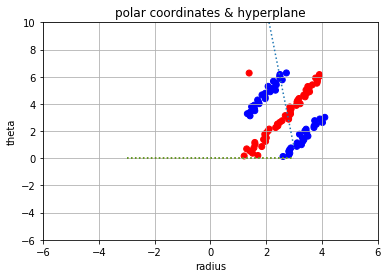

Mean Accuracy =  0.9629629629629629
Intercept =  [1.00003674]
Coefficients =  [[-0.00024189 -0.00293195]]
Total Intercepts: [array([1.00003674])]
Total Coefficients: [array([[-0.00024189, -0.00293195]])]
Mean Accuracy =  0.6533333333333333
Intercept =  [0.99999888]
Coefficients =  [[4.90954101e-06 1.43747638e-06]]
Total Intercepts: [array([1.00003674]), array([0.99999888])]
Total Coefficients: [array([[-0.00024189, -0.00293195]]), array([[4.90954101e-06, 1.43747638e-06]])]
Mean Accuracy =  0.8082191780821918
Intercept =  [-1.92985156]
Coefficients =  [[0.02273196 1.02904755]]
Total Intercepts: [array([1.00003674]), array([0.99999888]), array([-1.92985156])]
Total Coefficients: [array([[-0.00024189, -0.00293195]]), array([[4.90954101e-06, 1.43747638e-06]]), array([[0.02273196, 1.02904755]])]


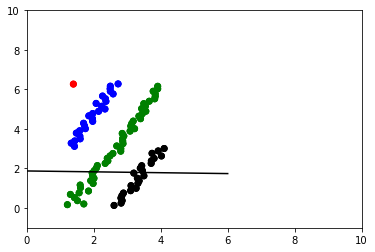

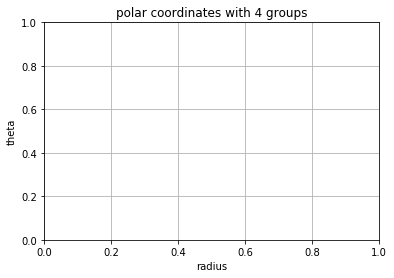

In [35]:
#----------------------------------------------------------------------------------------------------------------------------
#Q2

from collections import Counter
from sklearn import svm
XTrain=dataset[['x', 'y']] 
yTrain=dataset['SpectralCluster']

XTrain.head()

yTrain.head()

svmModel = svm.SVC(kernel = 'linear', random_state = 20191106, max_iter=-1)
fit = svmModel.fit(XTrain, yTrain)
yClassPrediction = fit.predict(XTrain)
w = fit.coef_[0]
a = -w[0] / w[1]
print("Accuracy = ", metrics.accuracy_score(yTrain, yClassPrediction))
print("Misclassficiation rate",1-metrics.accuracy_score(yTrain,yClassPrediction))
dataset['_PredictedClass_'] = yClassPrediction
svm_Mean = dataset.groupby('_PredictedClass_').mean()
svm_Mean.head()

w = fit.coef_[0]
a = -w[0] / w[1]

print("Coefficients ",w)

equation = "{}x + {}y + {} = 0".format(w[0],w[1],fit.intercept_[0])
print('Equation:',equation)

print('Intercept = ', fit.intercept_)
print('Coefficients = ', fit.coef_)

xx = np.linspace(-6, 6)
yy = np.zeros((len(xx),3))
for j in range(len(fit.coef_)):
    w = fit.coef_[j,:]
    a = -w[0] / w[1]
    yy[:,j] = a * xx - (fit.intercept_[j]) / w[1]
    #print(yy)

a=fit.coef_[0][0]
b=fit.coef_[0][1]
x = np.linspace(-6, 6)
y = np.zeros((len(x),3))
c=fit.coef_
#y=(c-(a*x))/b
for j in range(len(fit.coef_)):
    w = fit.coef_[j,:]
    a = -w[0] / w[1]
    y[:,j] = a * x - (fit.intercept_[j]) / w[1]
    #print(yy)
plt.plot(x, y, ':')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('scatter plot of X & Y with hyperplane')
plt.scatter(dataset['x'],dataset['y'], c=color)
plt.grid()
plt.show()

def getArcTan (z):
    theta = np.where(z < 0.0, 2.0*np.pi+z, z)
    return (theta)

dataset['radius'] = np.sqrt(dataset['x']**2 + dataset['y']**2)
dataset['theta'] = np.arctan2(dataset['y'],dataset['x'])
dataset['theta'] = dataset['theta'].apply(getArcTan)

XTrain = dataset[['radius','theta']]
yTrain = dataset['SpectralCluster']

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20191106, max_iter = -1)
fit = svm_Model.fit(XTrain, yTrain) 
y_predictClass = fit.predict(XTrain)

print('Mean Accuracy = ', metrics.accuracy_score(yTrain, y_predictClass))
dataset['_PredictedClass_'] = y_predictClass

print('Intercept = ', fit.intercept_)
print('Coefficients = ', fit.coef_)
a=fit.coef_[0][0]
b=fit.coef_[0][1]
x = np.linspace(-3, 3)
y = np.zeros((len(x),3))
c=fit.coef_
for j in range(len(fit.coef_)):
    w = fit.coef_[j,:]
    a = -w[0] / w[1]
    y[:,j] = a * x - (fit.intercept_[j]) / w[1]
plt.axis([-6,6,-6,10])
plt.xlabel('radius')
plt.ylabel('theta')
plt.title('polar coordinates & hyperplane')
plt.plot(x,y, ':')
plt.scatter(dataset['radius'],dataset['theta'], c=color)
plt.grid()
plt.show()


groups = []
points=[]
for i in range(len(dataset['theta'])):
    temp=[]
    temp.append(dataset['radius'][i])
    temp.append(dataset['theta'][i])
    points.append(temp)
    
# Manual Separation
for i in range(100):
    if(points[i][0]<1.7 and points[i][1]>6 and column[i]==0):
        groups.append(0)
    elif(points[i][0]>0 and points[i][0]<3 and points[i][1]>2.8 and column[i]==1):
        groups.append(1)
    elif(points[i][0]>2.5 and points[i][1]<3.2 and column[i]==1):
        groups.append(3)
    else:
        groups.append(2)
Counter(groups)
dataset['Group']=groups
ncolor = []
for i in groups:
    if i==0:
        ncolor.append('red')
    elif i==1:
        ncolor.append('blue')
    elif i==2:
        ncolor.append('green')
    else:
        ncolor.append('black')
plt.scatter(dataset['radius'],dataset['theta'], c=ncolor)

# interc=[1.00003674,0.99999888,-1.92985156]
# coeff=[[-0.00024189,-0.00293195],[0.0000049095,0.0000014375],[0.02273196,1.02904755]]
intercepts = []
coefficients = []

group0 = dataset[dataset['Group'] == 1]
group1 = dataset[dataset['Group'] == 0]
groupData = pd.concat([group0, group1])
xTrain = groupData[['x','y']]
yTrain = groupData['Group']

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20191106, max_iter = -1)
fit = svm_Model.fit(xTrain, yTrain) 
y_predictClass = fit.predict(xTrain)

print('Mean Accuracy = ', metrics.accuracy_score(yTrain, y_predictClass))
groupData['_PredictedClass_01'] = y_predictClass

print('Intercept = ', fit.intercept_)
print('Coefficients = ', fit.coef_)

intercepts.append(fit.intercept_)
coefficients.append(fit.coef_)
print('Total Intercepts:',intercepts)
print('Total Coefficients:',coefficients)

group2 = dataset[dataset['Group'] == 2]
group1 = dataset[dataset['Group'] == 1]
groupData = pd.concat([group2, group1])
xTrain = groupData[['x','y']]
yTrain = groupData['Group']

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20191106, max_iter = -1)
fit = svm_Model.fit(xTrain, yTrain) 
y_predictClass = fit.predict(xTrain)

print('Mean Accuracy = ', metrics.accuracy_score(yTrain, y_predictClass))
groupData['_PredictedClass_01'] = y_predictClass

print('Intercept = ', fit.intercept_)
print('Coefficients = ', fit.coef_)
intercepts.append(fit.intercept_)
coefficients.append(fit.coef_)
print('Total Intercepts:',intercepts)
print('Total Coefficients:',coefficients)

group3 = dataset[dataset['Group'] == 3]
group2 = dataset[dataset['Group'] == 2]
groupData = pd.concat([group3, group2])
xTrain = groupData[['x','y']]
yTrain = groupData['Group']

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20191106, max_iter = -1)
fit = svm_Model.fit(xTrain, yTrain) 
y_predictClass = fit.predict(xTrain)

print('Mean Accuracy = ', metrics.accuracy_score(yTrain, y_predictClass))
groupData['_PredictedClass_01'] = y_predictClass

print('Intercept = ', fit.intercept_)
print('Coefficients = ', fit.coef_)
intercepts.append(fit.intercept_)
coefficients.append(fit.coef_)
print('Total Intercepts:',intercepts)
print('Total Coefficients:',coefficients)

for j in range(len(intercepts)):
    w = coefficients[j].flatten()
    a = -w[0] / w[1]
    yy[:,j] = a * xx - (intercepts[j]) / w[1]
# print(yy)
plt.axis([0,10,-1,10])
plt.scatter(x = dataset['radius'],y = dataset['theta'],c = ncolor , s = 25)


intercepts

coefficients[0].flatten()[0]

groups = []
points=[]
for i in range(len(dataset['theta'])):
    temp=[]
    temp.append(dataset['radius'][i])
    temp.append(dataset['theta'][i])
    points.append(temp)
    
# Manual Separation
for i in range(100):
    if(points[i][0]<1.7 and points[i][1]>6 and column[i]==0):
        groups.append(0)
    elif(points[i][0]>0 and points[i][0]<3 and points[i][1]>2.8 and column[i]==1):
        groups.append(1)
    elif(points[i][0]>2.5 and points[i][1]<3.2 and column[i]==1):
        groups.append(3)
    else:
        groups.append(2)
Counter(groups)
dataset['Group']=groups
ncolor = []
for i in groups:
    if i==0:
        ncolor.append('red')
    elif i==1:
        ncolor.append('blue')
    elif i==2:
        ncolor.append('green')
    else:
        ncolor.append('black')
plt.scatter(dataset['radius'],dataset['theta'], c=ncolor)
plt.plot(xx, yy[:,0], color = 'black', linestyle = '-')
plt.plot(xx, yy[:,1], color = 'black', linestyle = '-')
plt.plot(xx, yy[:,2], color = 'black', linestyle = '-')
plt.xlabel('radius')
plt.ylabel('theta')
plt.title('polar coordinates with 4 groups')
plt.grid()
plt.show()
